In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=100):
        #initializing with random number
        self.W = np.random.rand(input_size+1)*0.1-0.05
        # add one for bias
        
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        z = self.W.dot(x)
        a = self.activation_fn(z)
        return a
    
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [13]:
#IMPLEMENTATION OF XOR GATE
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

d = np.array([0, 1, 1, 0])
perceptron = Perceptron(input_size=2, lr=0.4, epochs=50)
perceptron.fit(X, d)
print(perceptron.W)

[ 0.02941775 -0.04810018 -0.02917944]


In [14]:
#OUTPUT PREDICTION
for i in X:
    val = perceptron.predict(np.insert(i, 0, 1))
    print("X=%d, Y=%d, output=" %(i[0], i[1]), val)


X=0, Y=0, output= 1
X=0, Y=1, output= 1
X=1, Y=0, output= 0
X=1, Y=1, output= 0


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_true = d
y_pred = [1,1,0,0]

output = np.array(confusion_matrix(y_true, y_pred))
print(output)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

[[0 1]
 [2 1]]
Outcome values : 
 1 2 1 0
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           0       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



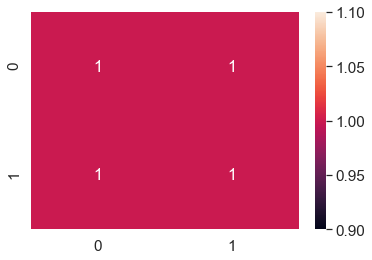

In [10]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[1,1],
         [1,1]]

df_cm = pd.DataFrame(array)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [11]:
def plot_data(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,6))
    plt.grid(True)

    #plot input samples(2D data points) and i have two classes. 
    #one is +1 and second one is -1, so it red color for +1 and blue color for -1
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.plot(i, y,'ko')

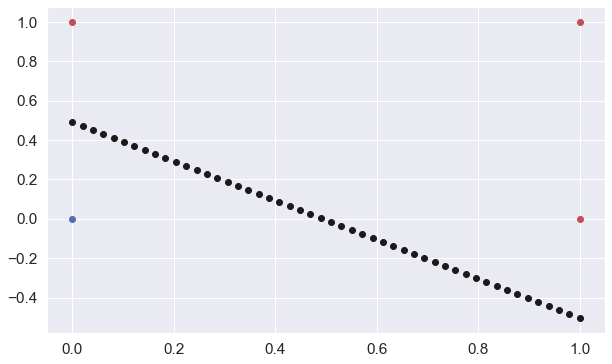

In [12]:
plot_data(X, d, perceptron.W)